In [66]:
import os

import pandas as pd

In [67]:
def print_distribution(name, samples):
    data = pd.read_csv(os.path.join(data_dir, '{}.csv'.format(name)), header=None)
    distribution = dict()
    for index, row in samples.iterrows():
        indices = row.values.tolist()
        classes = data.iloc[indices, -1].value_counts()
        for class_name, class_dist in classes.iteritems():
            if class_name not in distribution:
                distribution[class_name] = 0
            distribution[class_name] += class_dist
    total = sum(distribution.values())
    
    org_distribution = dict()
    df = data.iloc[:,-1].value_counts()
    for class_name, class_dist in df.iteritems():
        if class_name not in org_distribution:
            org_distribution[class_name] = 0
        org_distribution[class_name] += class_dist * n
    
    df1 = pd.DataFrame(distribution, index=['sampled'])
    df2 = pd.DataFrame(org_distribution, index=['original'])
    df = pd.concat([df1, df2])
    df.plot.barh(stacked=True, title=name)
    
    print('{} {} Total across samples: {} Total in dataset: {} Ratio: {:.0f}/{}'.format(name, distribution, total, data.shape[0], total/data.shape[0], n))

In [68]:
n = 10  #number of bootstrap samples per dataset

In [69]:
data_dir = os.path.join('..', 'data', 'ordinal', 'csv')

# Weights set to 1.0

In [70]:
sampling_dir = os.path.join('..', 'results', 'sampling')
samples_by_dataset = dict()
for file in os.listdir(sampling_dir):
    path = os.path.join(sampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    samples_by_dataset[name] = df

housing {3: 1313, 1: 1278, 4: 1206, 2: 1263} Total across samples: 5060 Total in dataset: 506 Ratio: 10/10
ERA_n {3: 1871, 4: 1761, 5: 1541, 2: 1426, 6: 1130, 7: 877, 1: 900, 8: 299, 9: 195} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
breast-w {'benign': 4650, 'malignant': 2340} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
ESL_n {6: 1370, 5: 1207, 4: 1001, 7: 554, 3: 374, 8: 189, 2: 126, 9: 41, 1: 18} Total across samples: 4880 Total in dataset: 488 Ratio: 10/10
dataset3 {3: 3642, 4: 3064, 2: 2982, 1: 2448, 5: 1144} Total across samples: 13280 Total in dataset: 1328 Ratio: 10/10
windsor {2: 1403, 1: 1360, 3: 1321, 0: 1376} Total across samples: 5460 Total in dataset: 546 Ratio: 10/10
balance_scale {'R': 2831, 'L': 2894, 'B': 525} Total across samples: 6250 Total in dataset: 625 Ratio: 10/10
breast-w_nm {'benign': 4585, 'malignant': 2405} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
LEV_n {2: 4062, 1: 2790, 3: 1950, 0: 930, 4: 268} T

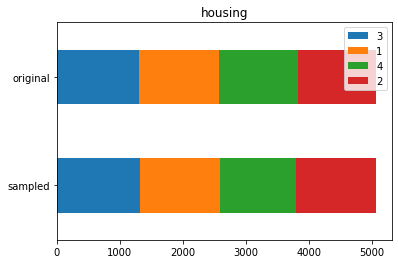

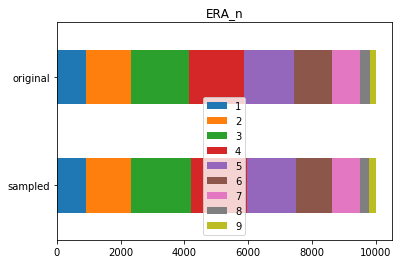

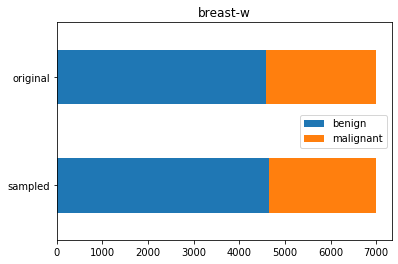

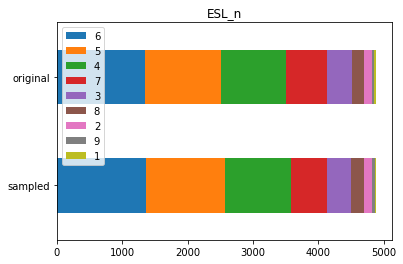

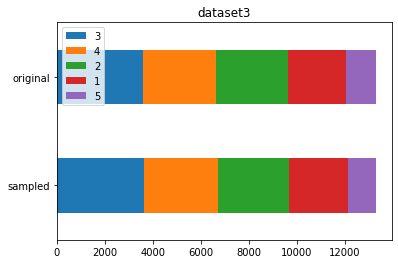

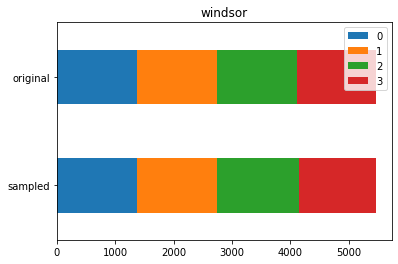

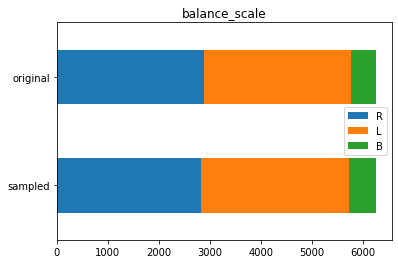

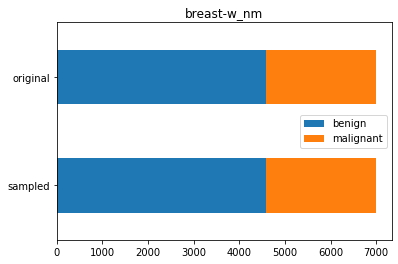

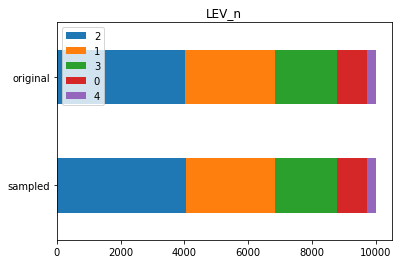

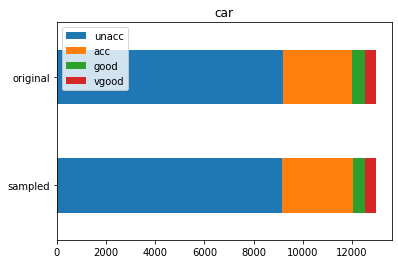

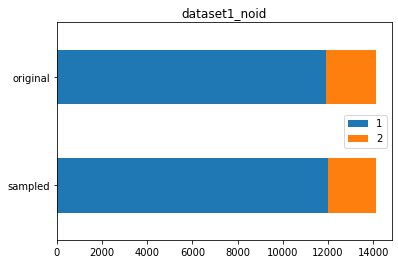

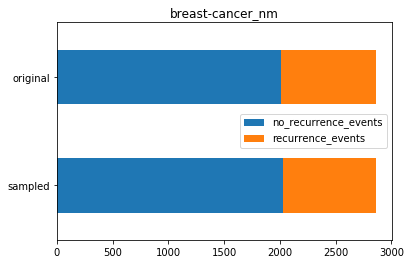

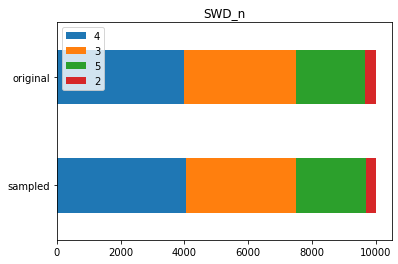

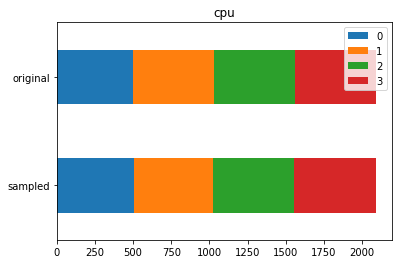

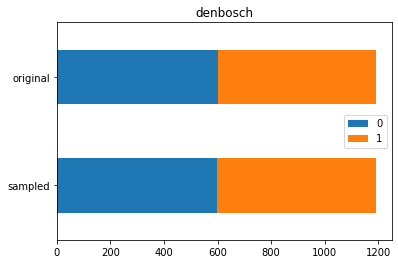

In [71]:
%matplotlib inline
for name, df in samples_by_dataset.items():
    print_distribution(name, df)

# Weights set according to class size
Each example's weight is set to ```min_class_size / current_example_class_size```

Bootstrap size equal to dataset size.

In [72]:
balanced_sampling_dir = os.path.join('..', 'results', 'balanced_sampling')
balanced_samples_by_dataset = dict()
for file in os.listdir(balanced_sampling_dir):
    path = os.path.join(balanced_sampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    balanced_samples_by_dataset[name] = df

housing {3: 1346, 4: 1265, 2: 1228, 1: 1221} Total across samples: 5060 Total in dataset: 506 Ratio: 10/10
ERA_n {4: 1121, 1: 1138, 8: 1097, 5: 1054, 9: 1131, 6: 1105, 3: 1119, 2: 1123, 7: 1112} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
breast-w {'malignant': 3515, 'benign': 3475} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



ESL_n {7: 574, 8: 572, 4: 508, 3: 553, 9: 504, 6: 527, 5: 575, 1: 516, 2: 551} Total across samples: 4880 Total in dataset: 488 Ratio: 10/10
dataset3 {1: 2675, 5: 2616, 3: 2665, 4: 2649, 2: 2675} Total across samples: 13280 Total in dataset: 1328 Ratio: 10/10
windsor {0: 1420, 1: 1321, 3: 1346, 2: 1373} Total across samples: 5460 Total in dataset: 546 Ratio: 10/10
balance_scale {'L': 2062, 'R': 2071, 'B': 2117} Total across samples: 6250 Total in dataset: 625 Ratio: 10/10
breast-w_nm {'malignant': 3559, 'benign': 3431} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
LEV_n {1: 1996, 4: 2029, 0: 2047, 2: 1999, 3: 1929} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
car {'good': 3213, 'vgood': 3208, 'unacc': 3257, 'acc': 3282} Total across samples: 12960 Total in dataset: 1296 Ratio: 10/10
dataset1_noid {2: 7084, 1: 7026} Total across samples: 14110 Total in dataset: 1411 Ratio: 10/10
breast-cancer_nm {'no_recurrence_events': 1427, 'recurrence_events': 1433}

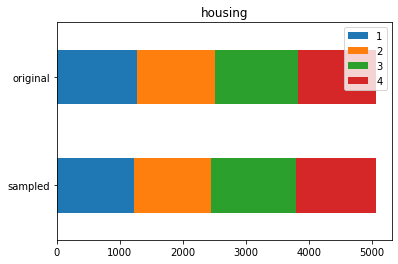

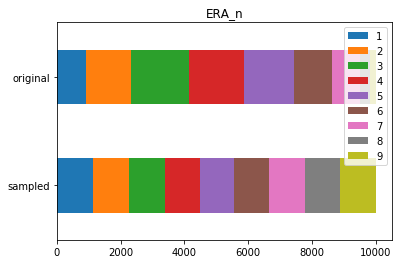

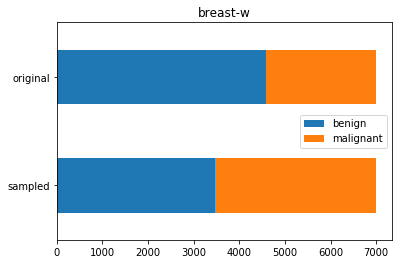

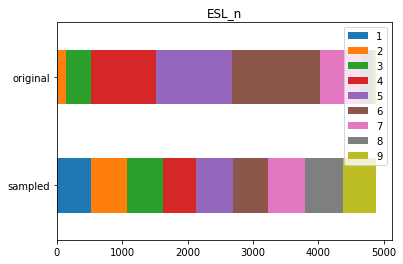

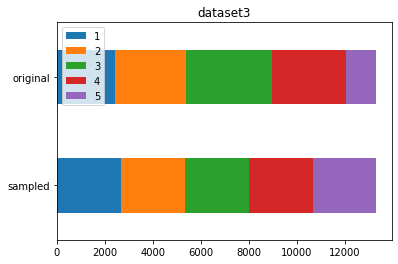

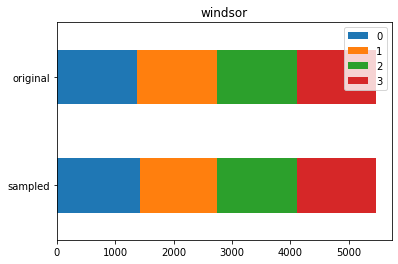

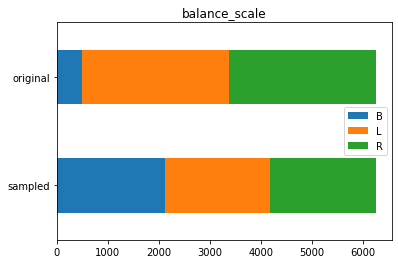

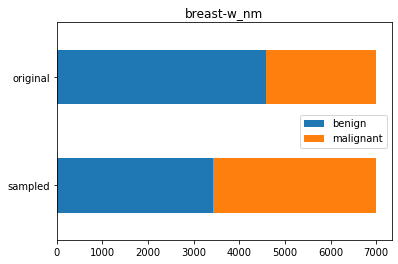

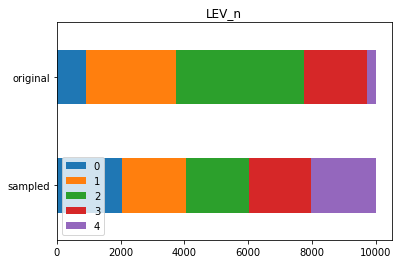

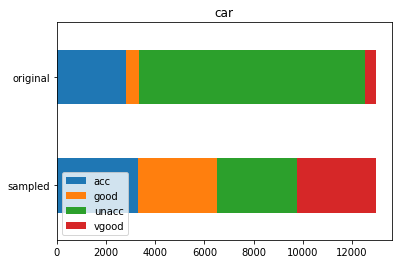

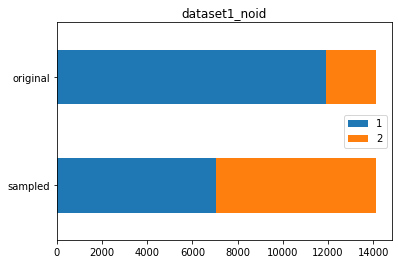

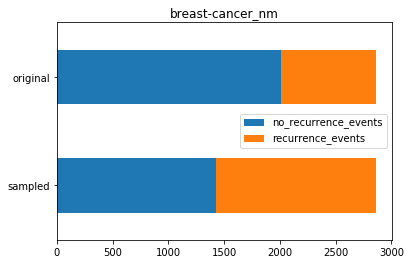

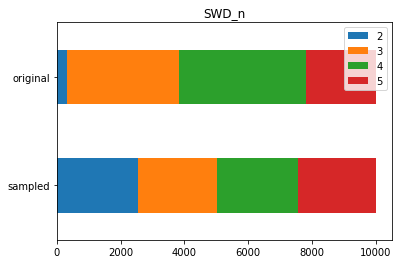

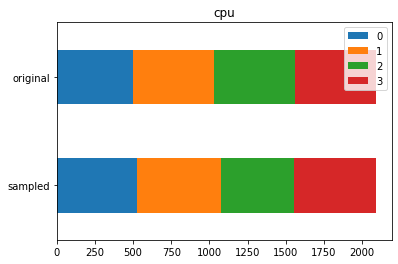

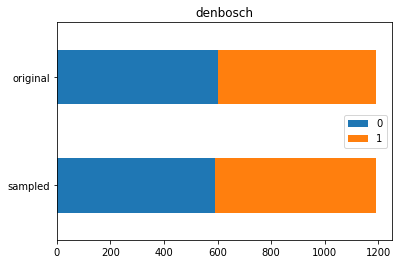

In [73]:
%matplotlib inline
for name, df in balanced_samples_by_dataset.items():
    print_distribution(name, df)

# Reduced bootstrap size
Weights are set as above. Bootstrap size equal to ```min_class_size * number_of_classes```

In [74]:
balanced_undersampling_dir = os.path.join('..', 'results', 'balanced_undersampling')
balanced_under_samples_by_dataset = dict()
for file in os.listdir(balanced_undersampling_dir):
    path = os.path.join(balanced_undersampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    balanced_under_samples_by_dataset[name] = df

housing {2: 1268, 1: 1262, 3: 1221, 4: 1209} Total across samples: 4960 Total in dataset: 506 Ratio: 10/10
ERA_n {5: 188, 8: 180, 4: 187, 3: 172, 6: 189, 9: 174, 7: 177, 2: 171, 1: 182} Total across samples: 1620 Total in dataset: 1000 Ratio: 2/10
breast-w {'malignant': 2416, 'benign': 2404} Total across samples: 4820 Total in dataset: 699 Ratio: 7/10
ESL_n {7: 27, 4: 23, 9: 15, 8: 15, 3: 17, 6: 28, 2: 10, 1: 20, 5: 25} Total across samples: 180 Total in dataset: 488 Ratio: 0/10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



dataset3 {1: 1320, 2: 1236, 4: 1233, 3: 1237, 5: 1174} Total across samples: 6200 Total in dataset: 1328 Ratio: 5/10
windsor {1: 1376, 2: 1318, 3: 1335, 0: 1371} Total across samples: 5400 Total in dataset: 546 Ratio: 10/10
balance_scale {'B': 483, 'L': 499, 'R': 488} Total across samples: 1470 Total in dataset: 625 Ratio: 2/10
breast-w_nm {'benign': 2416, 'malignant': 2404} Total across samples: 4820 Total in dataset: 699 Ratio: 7/10
LEV_n {2: 290, 0: 267, 3: 253, 4: 262, 1: 278} Total across samples: 1350 Total in dataset: 1000 Ratio: 1/10
car {'acc': 455, 'unacc': 492, 'vgood': 439, 'good': 414} Total across samples: 1800 Total in dataset: 1296 Ratio: 1/10
dataset1_noid {1: 2190, 2: 2170} Total across samples: 4360 Total in dataset: 1411 Ratio: 3/10
breast-cancer_nm {'recurrence_events': 892, 'no_recurrence_events': 808} Total across samples: 1700 Total in dataset: 286 Ratio: 6/10
SWD_n {4: 314, 2: 318, 5: 320, 3: 328} Total across samples: 1280 Total in dataset: 1000 Ratio: 1/10
cp

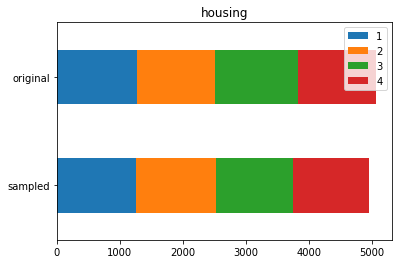

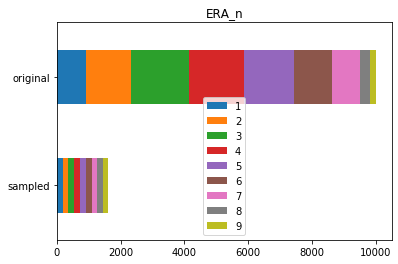

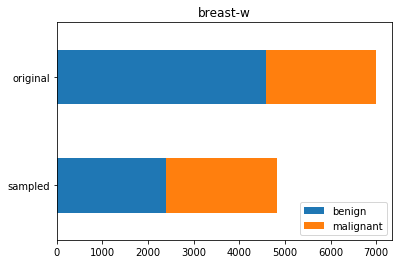

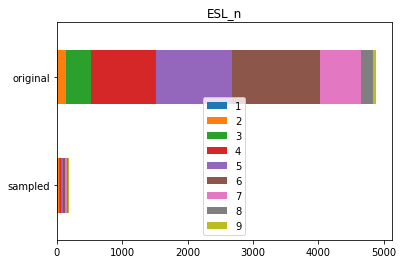

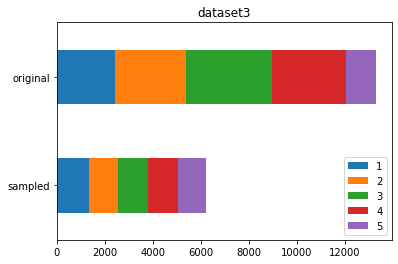

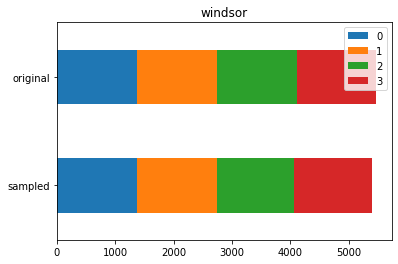

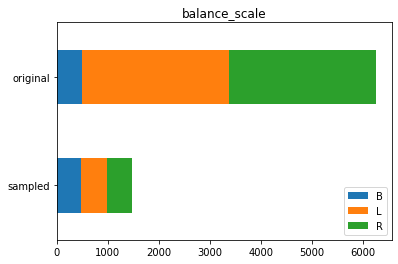

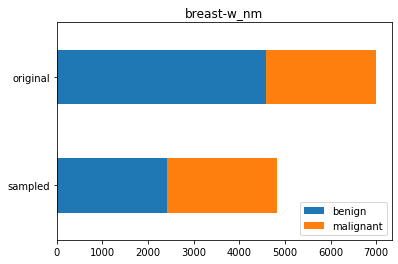

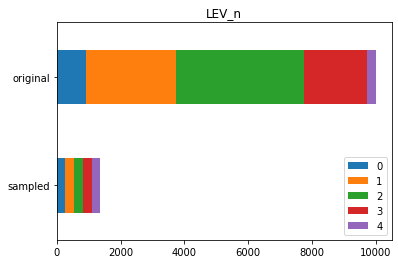

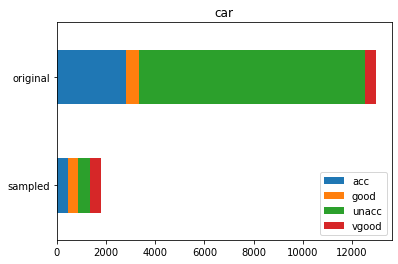

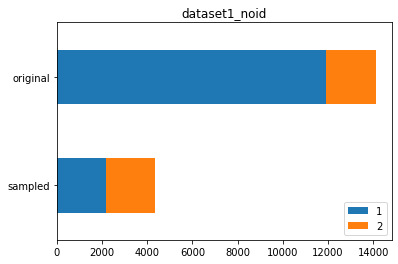

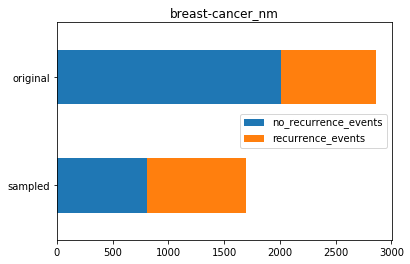

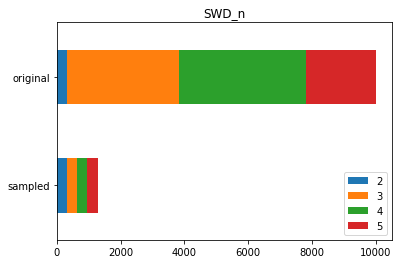

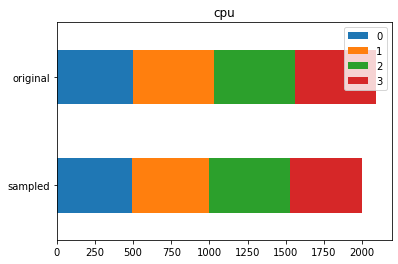

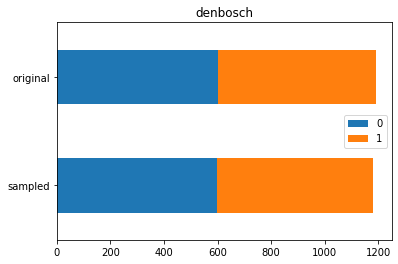

In [75]:
%matplotlib inline
for name, df in balanced_under_samples_by_dataset.items():
    print_distribution(name, df)

# Bootstrap check
Unique examples should constitute for around ```63%```.

### Test setup
Sample data below contains 10 examples from ```0``` class and 10 examples from ```1``` class (column ```2```). Index is fixed to include duplicate values. In both classes, 3 indices are duplicated. The ratio of unique examples to sample size should therefore be equal to ```8/20``` => ```0.4```

In [76]:
def check(sample):
    counts = sample.groupby(sample.index).count()[0]
    return len(counts[counts == 1])/ len(sample)


def check_per_class(sample):
    counts = sample.groupby([sample.columns[-1], sample.index]).count()[0]
    return len(counts[counts == 1])/ len(sample)


data = pd.DataFrame({
    0: [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    1: [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2],
    2: [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
}, index=[1,2,3,4,5,6,7,1,2,3,1,2,3,4,5,6,7,1,2,3])

print(check(data))
print(check_per_class(data))

0.0
0.4


In [83]:
def run_check_for_dataset(name, samples):
    dataset = pd.read_csv(os.path.join(data_dir, '{}.csv'.format(name)), header=None)
    ratios = []
    for index, row in samples.iterrows():
        indices = row.values.tolist()
        sample = dataset.iloc[indices]
        ratios.append(check(sample))
    avg_ratio = sum(ratios) / len(ratios)
    print('{}, size: {}, avg ratio: {}'.format(name, dataset.shape[0], avg_ratio))
    for ratio in ratios:
        print(ratio)
    print()

### Check baseline first: samples the size of dataset, all weights set to 1.0

In [84]:
for name, data in samples_by_dataset.items():
    run_check_for_dataset(name, data)

housing, size: 506, avg ratio: 0.36561264822134387
0.3794466403162055
0.3557312252964427
0.3359683794466403
0.4031620553359684
0.34980237154150196
0.35968379446640314
0.38537549407114624
0.38735177865612647
0.3695652173913043
0.3300395256916996

ERA_n, size: 1000, avg ratio: 0.3691999999999999
0.355
0.376
0.371
0.372
0.334
0.369
0.371
0.404
0.383
0.357

breast-w, size: 699, avg ratio: 0.36909871244635195
0.38912732474964234
0.36337625178826893
0.37052932761087265
0.39198855507868385
0.3590844062947067
0.36623748211731044
0.36623748211731044
0.3834048640915594
0.36623748211731044
0.33476394849785407

ESL_n, size: 488, avg ratio: 0.3629098360655738
0.36270491803278687
0.35040983606557374
0.35655737704918034
0.3668032786885246
0.3360655737704918
0.39959016393442626
0.38934426229508196
0.3524590163934426
0.3524590163934426
0.36270491803278687

dataset3, size: 1328, avg ratio: 0.36596385542168675
0.3742469879518072
0.3629518072289157
0.37123493975903615
0.348644578313253
0.3810240963855422


### Check weighted sampling (sample size equal to dataset size)

In [85]:
for name, data in balanced_samples_by_dataset.items():
    run_check_for_dataset(name, data)

housing, size: 506, avg ratio: 0.3693675889328063
0.3814229249011858
0.35968379446640314
0.37549407114624506
0.38537549407114624
0.35375494071146246
0.3675889328063241
0.3616600790513834
0.383399209486166
0.37351778656126483
0.35177865612648224

ERA_n, size: 1000, avg ratio: 0.3358
0.356
0.314
0.344
0.337
0.337
0.363
0.318
0.321
0.35
0.318

breast-w, size: 699, avg ratio: 0.344206008583691
0.34620886981402005
0.3261802575107296
0.35765379113018597
0.3490701001430615
0.35050071530758226
0.34763948497854075
0.3218884120171674
0.33476394849785407
0.36623748211731044
0.3419170243204578

ESL_n, size: 488, avg ratio: 0.2954918032786885
0.3012295081967213
0.29098360655737704
0.33811475409836067
0.29098360655737704
0.3012295081967213
0.3155737704918033
0.29098360655737704
0.27459016393442626
0.27049180327868855
0.2807377049180328

dataset3, size: 1328, avg ratio: 0.3514307228915663
0.33509036144578314
0.35316265060240964
0.3381024096385542
0.3629518072289157
0.36521084337349397
0.3396084337349

### Check weighted undersampling (reduced sample size)

In [86]:
for name, data in balanced_under_samples_by_dataset.items():
    run_check_for_dataset(name, data)

housing, size: 506, avg ratio: 0.3846774193548387
0.37298387096774194
0.35080645161290325
0.3810483870967742
0.38306451612903225
0.38911290322580644
0.4012096774193548
0.39314516129032256
0.42943548387096775
0.38306451612903225
0.3629032258064516

ERA_n, size: 1000, avg ratio: 0.7895061728395061
0.7777777777777778
0.8024691358024691
0.808641975308642
0.808641975308642
0.8333333333333334
0.7098765432098766
0.7962962962962963
0.7407407407407407
0.8580246913580247
0.7592592592592593

breast-w, size: 699, avg ratio: 0.4796680497925312
0.4854771784232365
0.487551867219917
0.4190871369294606
0.48132780082987553
0.45228215767634855
0.483402489626556
0.483402489626556
0.5871369294605809
0.487551867219917
0.42946058091286304

ESL_n, size: 488, avg ratio: 0.9111111111111111
1.0
1.0
0.8888888888888888
1.0
0.8888888888888888
1.0
1.0
0.8888888888888888
0.7777777777777778
0.6666666666666666

dataset3, size: 1328, avg ratio: 0.6125806451612903
0.6258064516129033
0.6451612903225806
0.5951612903225807
